Vũ Đức An - 11204235

Implement kmean algorithm by Numpy

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

In [56]:
def kmeans(X, k, max_iter=100):
    m, n = X.shape
    # Initialize centroids randomly
    centroids = X[np.random.choice(m, k, replace=False), :]
    for i in range(max_iter):
        # Calculate distances between each data point and centroids
        distances = np.zeros((m, k))
        for j in range(k):
            distances[:, j] = np.sum((X - centroids[j, :])**2, axis=1)
        # Assign each data point to the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)
        # Recalculate centroids as the mean of all data points assigned to it
        new_centroids = np.zeros((k, n))
        for j in range(k):
            cluster = X[cluster_assignments == j, :]
            new_centroids[j, :] = np.mean(cluster, axis=0)
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, cluster_assignments

In [57]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
centroids, cluster_assignments = kmeans(X, k=2, max_iter=100)
print("Centroids:", centroids)
print("Cluster assignments:", cluster_assignments)

Centroids: [[4 2]
 [1 2]]
Cluster assignments: [1 1 1 0 0 0]


Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

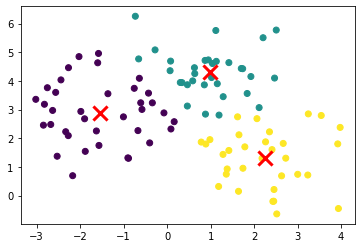

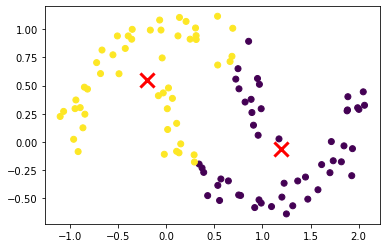

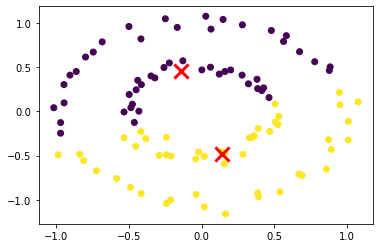

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# Creating toy datasets
X1, y1 = make_blobs(n_samples=100, centers=3, random_state=0)
X2, y2 = make_moons(n_samples=100, noise=0.1, random_state=0)
X3, y3 = make_circles(n_samples=100, noise=0.05, random_state=0, factor=0.5)

# Apply the k-means algorithm to each dataset
centroids1, cluster_assignments1 = kmeans(X1, k=3, max_iter=100)
centroids2, cluster_assignments2 = kmeans(X2, k=2, max_iter=100)
centroids3, cluster_assignments3 = kmeans(X3, k=2, max_iter=100)

# Plotting the results
plt.scatter(X1[:, 0], X1[:, 1], c=cluster_assignments1)
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

plt.scatter(X2[:, 0], X2[:, 1], c=cluster_assignments2)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

plt.scatter(X3[:, 0], X3[:, 1], c=cluster_assignments3)
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()



Read and understand how to choose k (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares')

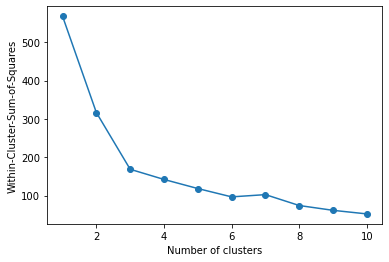

In [59]:
def WCSS(X, cluster_assignments, centroids):
    WCSS = 0
    for i in range(len(X)):
        x = X[i]
        closest_centroid_index = cluster_assignments[i]
        centroid = centroids[closest_centroid_index]
        WCSS += np.linalg.norm(x - centroid) ** 2
    return WCSS

def elbow_method(X, max_k):
    WCSS_values = []
    for k in range(1, max_k + 1):
        centroids, cluster_assignments = kmeans(X, k=k, max_iter=100)
        WCSS_values.append(WCSS(X, cluster_assignments, centroids))
    return WCSS_values

# Plot the Elbow Method for the first dataset
WCSS_values = elbow_method(X1, max_k=10)
plt.plot(range(1, len(WCSS_values) + 1), WCSS_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')


Text(0, 0.5, 'Within-Cluster-Sum-of-Squares')

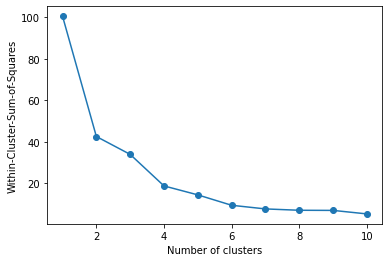

In [60]:
# Plot the Elbow Method for the second dataset
WCSS_values = elbow_method(X2, max_k=10)
plt.plot(range(1, len(WCSS_values) + 1), WCSS_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares')

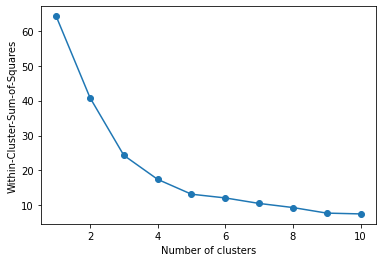

In [61]:
# Plot the Elbow Method for the third dataset
WCSS_values = elbow_method(X3, max_k=10)
plt.plot(range(1, len(WCSS_values) + 1), WCSS_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')